# SAFARI app
We are going to use this Notebook to train our YOLOv8 model using the dataset already provided with animal images and anotations. To speed up the trainig, we will use the GPU card we had configured. Once finished, we will need to convert the model into onxx format to be able to port it to the Container image.

## Setup
Clone Ultralytics' GitHub [repository](https://github.com/ultralytics/ultralytics), install ultralytics and imoprt YOLO.

In [1]:
!pip install --upgrade pip
!pip install pickleshare
!pip install seaborn
!pip install opencv-python-headless
!pip install py-cpuinfo

!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics

from ultralytics import YOLO
from PIL import Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 60.3 MB/s eta 0:00:00a 0:00:01m
Cloning into 'ultralytics'...
remote: Enumerating objects: 25330, done.
remote: Counting objects: 100% (797/797), done.
remote: Compressing objects: 100% (548/548), done.
remote: Total 25330 (delta 485), reused 469 (delta 245), pack-reused 24533
Receiving objects: 100% (25330/25330), 15.08 MiB | 22.41 MiB/s, done.
Resolving deltas: 100% (17817/17817), done.
/opt/app-root/src/safari-demo/notebooks/ultralytics


/opt/app-root/lib64/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Data preparation
Data preparation is usually a big task. You might have to clean, label and format data into training and test data sets. Let's see the content of our dataset: 

In [2]:
!ls /opt/app-root/src/safari-demo/dataset/*

/opt/app-root/src/safari-demo/dataset/data.yaml

/opt/app-root/src/safari-demo/dataset/test:
images	labels

/opt/app-root/src/safari-demo/dataset/train:
images	labels

/opt/app-root/src/safari-demo/dataset/validation:
sample.mp4  sample.png


## Model training
Train the YOLOv8 model by specifying dataset, batch-size, image size and pretrained --weights yolov8m.pt. Pretrained weights are auto-downloaded from the latest [YOLOv8 release](https://github.com/ultralytics/ultralytics).

In [3]:
model = YOLO("yolov8m.pt")
model.train(data='/opt/app-root/src/safari-demo/dataset/data.yaml', epochs=100, imgsz=640, batch=16)

100%|██████████| 49.7M/49.7M [00:00<00:00, 106MB/s] 


Ultralytics YOLOv8.2.12 🚀 Python-3.9.18 torch-2.2.2+cu121 CUDA:0 (Tesla M60, 8117MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/opt/app-root/src/safari-demo/dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 20.4MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

100%|██████████| 6.23M/6.23M [00:00<00:00, 39.0MB/s]


AMP: checks passed ✅


train: Scanning /opt/app-root/src/safari-demo/dataset/train/labels... 19192 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19192/19192 [00:15<00:00, 1225.51it/s]


train: New cache created: /opt/app-root/src/safari-demo/dataset/train/labels.cache


val: Scanning /opt/app-root/src/safari-demo/dataset/test/labels... 6505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6505/6505 [00:06<00:00, 1023.90it/s]


val: New cache created: /opt/app-root/src/safari-demo/dataset/test/labels.cache
Plotting labels to /opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      7.83G     0.8994      2.755      1.396         18        640: 100%|██████████| 1200/1200 [32:28<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:28<00:00,  1.02s/it]


                   all       6505       7576      0.571      0.289      0.253      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      7.37G     0.8683      1.717      1.345         16        640: 100%|██████████| 1200/1200 [32:14<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:27<00:00,  1.02s/it]


                   all       6505       7576       0.46      0.391      0.333       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       7.3G     0.8817      1.606      1.346         13        640: 100%|██████████| 1200/1200 [32:10<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:24<00:00,  1.00s/it]


                   all       6505       7576      0.487      0.379      0.368      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      7.32G     0.8714      1.509      1.334         12        640: 100%|██████████| 1200/1200 [32:08<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:25<00:00,  1.01s/it]


                   all       6505       7576      0.403      0.444      0.392      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      7.29G     0.8455      1.417      1.318         22        640: 100%|██████████| 1200/1200 [32:06<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:24<00:00,  1.00s/it]


                   all       6505       7576      0.428       0.45      0.423      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      7.34G     0.8276      1.319      1.298         19        640: 100%|██████████| 1200/1200 [32:08<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:24<00:00,  1.00s/it]


                   all       6505       7576      0.457      0.465      0.445       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      7.29G     0.8183      1.248       1.29         16        640: 100%|██████████| 1200/1200 [32:08<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:25<00:00,  1.01s/it]


                   all       6505       7576      0.448       0.49      0.461      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      7.29G     0.7948      1.189      1.275         39        640: 100%|██████████| 1200/1200 [32:07<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:24<00:00,  1.00s/it]


                   all       6505       7576      0.477      0.482      0.477      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      7.35G     0.7858      1.147      1.266         17        640: 100%|██████████| 1200/1200 [32:07<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:24<00:00,  1.00s/it]


                   all       6505       7576      0.441      0.522      0.491      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      7.33G     0.7709      1.091      1.254         22        640: 100%|██████████| 1200/1200 [32:07<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:24<00:00,  1.00s/it]


                   all       6505       7576      0.467      0.516      0.503      0.433
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      7.34G     0.6283     0.7314      1.192          8        640: 100%|██████████| 1200/1200 [32:08<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:24<00:00,  1.00s/it]


                   all       6505       7576      0.469      0.521      0.508      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      7.34G     0.6073     0.6757      1.171         10        640: 100%|██████████| 1200/1200 [32:05<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:24<00:00,  1.00s/it]


                   all       6505       7576      0.471      0.535      0.519      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.31G     0.5933     0.6271      1.158         29        640: 100%|██████████| 1200/1200 [32:06<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:24<00:00,  1.00s/it]


                   all       6505       7576      0.467      0.535      0.525       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.34G     0.5774     0.5777      1.143         10        640: 100%|██████████| 1200/1200 [32:06<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:24<00:00,  1.00s/it]


                   all       6505       7576      0.473      0.554      0.532      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.34G     0.5651     0.5412      1.133          8        640: 100%|██████████| 1200/1200 [32:06<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:23<00:00,  1.00it/s]


                   all       6505       7576      0.502       0.55       0.54      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.33G     0.5524     0.5112      1.119          8        640: 100%|██████████| 1200/1200 [32:05<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:23<00:00,  1.00it/s]


                   all       6505       7576      0.473      0.555      0.537      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.34G     0.5408     0.4736      1.108          9        640: 100%|██████████| 1200/1200 [32:06<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:23<00:00,  1.00it/s]


                   all       6505       7576       0.48      0.558      0.541       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      7.29G     0.5262     0.4429      1.098          8        640: 100%|██████████| 1200/1200 [32:06<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:23<00:00,  1.00it/s]


                   all       6505       7576      0.482      0.574      0.547      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      7.34G      0.518     0.4185      1.089          8        640: 100%|██████████| 1200/1200 [32:05<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:23<00:00,  1.00it/s]


                   all       6505       7576      0.498      0.571       0.55       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      7.29G     0.5068      0.396      1.082          9        640: 100%|██████████| 1200/1200 [32:05<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:23<00:00,  1.00it/s]


                   all       6505       7576      0.504      0.569      0.549      0.491

20 epochs completed in 11.867 hours.
Optimizer stripped from /opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from /opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.pt, 52.1MB

Validating /opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.12 🚀 Python-3.9.18 torch-2.2.2+cu121 CUDA:0 (Tesla M60, 8117MiB)
Model summary (fused): 218 layers, 25886080 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:17<00:00,  1.03it/s]


                   all       6505       7576      0.505      0.569      0.549      0.491
          Hippopotamus       6505         33      0.487      0.697      0.628      0.547
               Sparrow       6505        138      0.827      0.913      0.912      0.838
                Magpie       6505         34      0.529      0.794      0.781      0.745
            Rhinoceros       6505         46       0.73      0.935      0.919       0.84
              Seahorse       6505         39     0.0394    0.00202      0.266      0.172
             Butterfly       6505        185      0.784      0.854      0.853      0.755
               Ladybug       6505         40      0.876      0.925      0.918      0.716
               Raccoon       6505         59      0.832      0.754      0.831      0.734
                  Crab       6505        120      0.546        0.9      0.729      0.678
                   Pig       6505        128      0.662      0.664      0.709      0.638
                  Bul

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f174d459730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024

## Validation
Now that we have our model, we can made predictions with new images:


image 1/1 /opt/app-root/src/safari-demo/dataset/validation/sample.png: 448x640 1 Brown bear, 110.4ms
Speed: 3.5ms preprocess, 110.4ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/predict


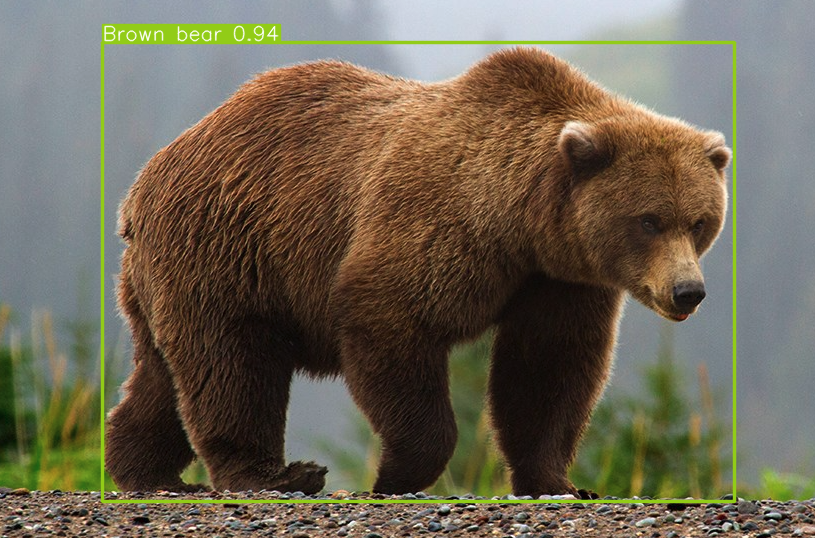

In [4]:
model = YOLO('/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.pt')
results = model('/opt/app-root/src/safari-demo/dataset/validation/sample.png', save=True)
Image.open('/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/predict/sample.png')

## Export 
Finally, we're going to export our file in ONNX format so we can use it in our application. Make sure to change the path to correspond with where your weights are saved.

In [5]:
model.export(format='onnx')

Ultralytics YOLOv8.2.12 🚀 Python-3.9.18 torch-2.2.2+cu121 CPU (Intel Xeon Silver 4116 2.10GHz)

PyTorch: starting from '/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (49.7 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 5.5s, saved as '/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.onnx' (99.0 MB)

Export complete (13.4s)
Results saved to /opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights
Predict:         yolo predict task=detect model=/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.onnx imgsz=640 data=/opt/app-root/src/safari-demo/dataset/data.yaml  
Visualize:       https://netron.app


'/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.onnx'

## Next
Now that we have exported our model, download the file. The next step will be to deploy our Safari application using MicroShift. 

## Extra Fun: Video Recognition
If you want to do one more prediction, let's make some with a video.

In [ ]:
results = model('/opt/app-root/src/safari-demo/dataset/validation/sample.mp4', save=True, imgsz=640)